<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Exam_preparation/nlp_imdb_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDb reviews sentiment analysis

## Data preparation

In [224]:
# Download Dataset 
!wget "https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/Datasets/IMDB%20Dataset.csv"

--2021-09-09 12:05:05--  https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/Datasets/IMDB%20Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66212309 (63M) [text/plain]
Saving to: ‘IMDB Dataset.csv.1’

IMDB Dataset.csv.1  100%[===================>]  63.14M   158MB/s    in 0.4s    

2021-09-09 12:05:17 (158 MB/s) - ‘IMDB Dataset.csv.1’ saved [66212309/66212309]



In [225]:
#Load in the dataset 
import pandas as pd
df = pd.read_csv("/content/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [227]:
#Visualize some random examples
import random
random_index = random.randint(0, len(df)-5)
for row in df[["review", "sentiment"]][random_index:random_index+5].itertuples():
  _, review, sentiment = row
  print(f"Text: {review}")
  print(f"Sentiment: {sentiment}\n")

Text: Truly a great leap forward in the perfection of painful cinema.<br /><br />Everything about this film is bad. Acting (if it can be called that), lighting, sound, script (if there was one), editing, direction, camera work, it is all atrocious. There is not a single element that is done well. If I thought that this was intentional then I might give the film some credit but I can not believe people would set out to make such a horendous film.<br /><br />This film is worth buying and screening to your worst enemies.
Sentiment: negative

Text: A nicely done thriller with plenty of sex in it. I saw it on late night TV. There are two hardcore stars in it, Lauen Montgomery and Venus. Thankfully, Gabriella Hall has just a small part.
Sentiment: positive

Text: Vidor shines as Judith, the only truly strong and compassionate member of a strictly patriarchal family. Her brother, David, is so downtrodden by their father that it's a surprise he's able even to tie his shoes, rather than asking 

In [228]:
#Check if null data is in datset  
df.isna().sum()

review       0
sentiment    0
dtype: int64

### Clean data

In [229]:
#Preprocessing function
import re
def preprocessing_text(texts):
    texts = re.sub(r'<.*?>', '', texts)
    texts = re.sub(r'[^a-zA-Z]', ' ', texts)
    return ' '.join(x.lower() for x in texts.split())

In [230]:
df["cleaned"] = df["review"].apply(lambda x: preprocessing_text(x))

In [231]:
df.head()

,review,sentiment,cleaned
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...


In [232]:
#Visualize some random examples cleaned vs uncleaned
import random
random_index = random.randint(0, len(df)-5)
for row in df[["review", "sentiment", "cleaned"]][random_index:random_index+5].itertuples():
  _, review, sentiment, cleaned = row
  print(f"Text: {review}")
  print(f"Text cleaned: {cleaned}")
  print(f"Sentiment: {sentiment}\n")

Text: This film was nothing more than exploitative gay cheesecake. It was not an "art" movie; just an excuse to show several gratuitous, exploitative, over-the-top scenes with extensive male genital nudity. There was a locker room scene involving over a dozen naked men. The camera zooms in on the men's asses and penises as they are portrayed for several minutes with their dicks in full screen view. There are several scenes in this film showing penis after penis. It gets redundant REAL fast and makes it impossible to take this film seriously. I was wondering if I was watching a Playgirl video by mistake. If these same scenes were filmed using women (ex: totally naked and showing their vaginas repeatedly) it would be quickly dismissed as just softcore porn and an excuse to show a lot of eye candy...which is all that this film is. Any artistic merit got flushed down the drain of the gay ghetto mentality. The themes of class distinction, homosexuality, longing-desire, etc. were simple and 

### Remove stopwords

In [233]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [234]:
df["cleaned_without_stopwords"] = df["cleaned"].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))

In [235]:
#Visualize some random examples after removing stop words
import random
random_index = random.randint(0, len(df)-5)
for row in df[["cleaned_without_stopwords", "cleaned", "sentiment"]][random_index:random_index+5].itertuples():
  _, cleaned_without_stopwords, cleaned, sentiment = row
  print(f"Text with stopwords: {cleaned}")
  print(f"Text without stopwords: {cleaned_without_stopwords}")
  print(f"Sentiment: {sentiment}\n")

Text with stopwords: the name frau of the main character is the german word for woman i don t know if that was intentional or not but if sure got some giggles from the german audience at the fantasy film festival last year when it was shown but those were the only giggles the movie got not that it was aiming for giggles it s a horrible movie for heaven s sake a horrible movie in more than one meaning it s a shame that a premise like that was wasted with horrible even unbearable moments for the viewer definetely not for the faint of heart and it wasn t even necessary to show all the things that are shown i m not even going into a moral obligation because movies don t really have that kind of task or function discussion of what is shown here but this is a new low on the whole torture movement that has grown in the last few years
Text without stopwords: name frau main character german word woman know intentional sure got giggles german audience fantasy film festival last year shown giggle

### Encode the labels

In [236]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
df["sentiment_label_bin"] = lb.fit_transform(df["sentiment"])

In [237]:
df.head()

,review,sentiment,cleaned,cleaned_without_stopwords,sentiment_label_bin
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,one reviewers mentioned watching oz episode ho...,1
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,wonderful little production filming technique ...,1
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...,1
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...,basically family little boy jake thinks zombie...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...,petter mattei love time money visually stunnin...,1


### Split dataset and create dataframes

In [238]:
import numpy as np
np.random.seed(42)
perm = np.random.permutation(df.index)
m = len(df)
train_end = int(0.6 * m)
validate_end = int(0.2 * m) + train_end
train = df.iloc[perm[:train_end]]
validate = df.iloc[perm[train_end:validate_end]]
test = df.iloc[perm[validate_end:]]

In [239]:
len(train), len(validate), len(test)

(30000, 10000, 10000)

In [240]:
#Turn dataframes into numpy arrays 
train_sentences = train["cleaned_without_stopwords"].to_numpy()
train_labels = train["sentiment_label_bin"].to_numpy()
val_sentences = validate["cleaned_without_stopwords"].to_numpy()
val_labels = validate["sentiment_label_bin"].to_numpy()
test_sentences = test["cleaned_without_stopwords"].to_numpy()
test_labels = test["sentiment_label_bin"].to_numpy()
train_sentences.shape, val_sentences.shape, test_sentences.shape

((30000,), (10000,), (10000,))

In [241]:
train_sentences[:10], train_labels[:10]

(array(['really liked summerslam due look arena curtains look overall interesting reason anyways could one best summerslam ever wwf lex luger main event yokozuna time ok huge fat man vs strong man glad times changed terrible main event like every match luger terrible matches card razor ramon vs ted dibiase steiner brothers vs heavenly bodies shawn michaels vs curt hening event shawn named big monster body guard diesel irs vs kid bret hart first takes doink takes jerry lawler stuff harts lawler always interesting ludvig borga destroyed marty jannetty undertaker took giant gonzalez another terrible match smoking gunns tatanka took bam bam bigelow headshrinkers yokozuna defended world title lex luger match boring terrible ending however deserves',
        'many television shows appeal quite many different kinds fans like farscape know youngsters years old fans male female many different countries think adore v miniseries elements found almost every show v character driven drama could aust

### Create TensorFlow Datasets

In [242]:
#Turn data into TensorFlow Dataset
import tensorflow as tf
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

In [243]:
train_dataset, val_dataset, test_dataset

(<PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>,
 <PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>,
 <PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>)

## Create Text Vectorization layer


In [244]:
#Find average number of words in training sentences
sent_len = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_len)
avg_sent_len

118.65736666666666

(array([2.4173e+04, 4.6100e+03, 1.0500e+03, 1.6100e+02, 2.0000e+00,
        1.0000e+00, 3.0000e+00]),
 array([   3.        ,  167.42857143,  331.85714286,  496.28571429,
         660.71428571,  825.14285714,  989.57142857, 1154.        ]),
 <a list of 7 Patch objects>)

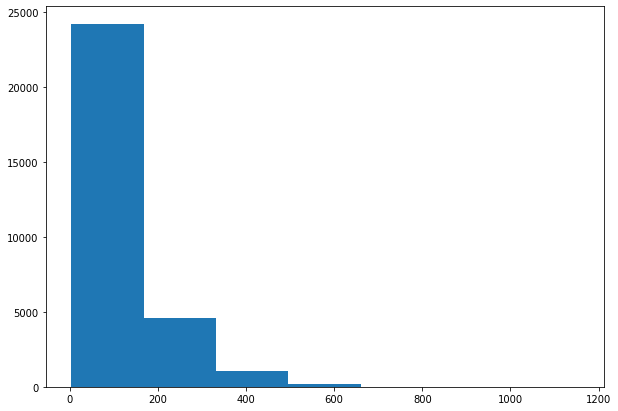

In [245]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.hist(sent_len, bins=7)

In [246]:
# How long of a sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(sent_len, 95))
output_seq_len

307

In [250]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_vocab_length = 5000
max_length = output_seq_len
max_length = 100

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [251]:
#Fit vectorizer to train sentences
text_vectorizer.adapt(train_sentences)

## Create Embedding layer

In [252]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=64,
                             embeddings_initializer="uniform",
                             input_length=max_length)

## Modelling experiments

In [27]:
!wget !wget https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/helper_functions.py

--2021-09-09 09:43:34--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2021-09-09 09:43:34--  https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5005 (4.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   4.89K  --.-KB/s    in 0s      

2021-09-09 09:43:35 (48.1 MB/s) - ‘helper_functions.py’ saved [5005/5005]

FINISHED --2021-09-09 09:43:35--
Total wall clock time: 0.5s
Downloaded: 1 files, 4.9K in 0s (48.1 MB/s)


In [253]:
from helper_functions import plot_training_curve

### Model 1: Dense

In [254]:
tf.random.set_seed(42)

#Build the model 
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Dropout(0.5)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs)

In [255]:
#Compile the model 
model_1.compile(loss="binary_crossentropy", optimizer="Adam", metrics="accuracy")

In [256]:
#Fit the model 
history_model_1 = model_1.fit(train_dataset,
                              epochs=100,
                              batch_size=128,
                              validation_data=val_dataset,
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)])

Epoch 1/100
938/938 [==============================] - 9s 9ms/step - loss: 0.5675 - accuracy: 0.7655 - val_loss: 0.4286 - val_accuracy: 0.8380
Epoch 2/100
938/938 [==============================] - 8s 8ms/step - loss: 0.3672 - accuracy: 0.8567 - val_loss: 0.3460 - val_accuracy: 0.8579
Epoch 3/100
938/938 [==============================] - 8s 8ms/step - loss: 0.3109 - accuracy: 0.8749 - val_loss: 0.3243 - val_accuracy: 0.8617
Epoch 4/100
938/938 [==============================] - 8s 9ms/step - loss: 0.2868 - accuracy: 0.8846 - val_loss: 0.3168 - val_accuracy: 0.8657
Epoch 5/100
938/938 [==============================] - 8s 8ms/step - loss: 0.2713 - accuracy: 0.8905 - val_loss: 0.3155 - val_accuracy: 0.8666
Epoch 6/100
938/938 [==============================] - 8s 8ms/step - loss: 0.2614 - accuracy: 0.8950 - val_loss: 0.3163 - val_accuracy: 0.8674
Epoch 7/100
938/938 [==============================] - 8s 9ms/step - loss: 0.2520 - accuracy: 0.8979 - val_loss: 0.3188 - val_accuracy: 0.8665

In [257]:
#Evaluate
model_1.evaluate(test_dataset)

313/313 [==============================] - 4s 11ms/step - loss: 0.3191 - accuracy: 0.8678


[0.3190637230873108, 0.8677999973297119]

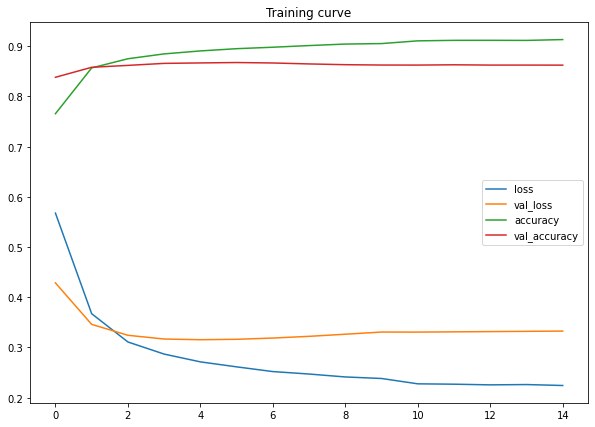

In [258]:
#Plot model history
plot_training_curve(history_model_1)

### Model 2: Conv1D

In [206]:
tf.random.set_seed(42)

#Build the model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.SpatialDropout1D(0.5)(x)
x = layers.Conv1D(8, 2, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001), activity_regularizer=tf.keras.regularizers.l1(0.001))(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs)

In [207]:
#Compile the model 
model_2.compile(loss="binary_crossentropy", optimizer="Adam", metrics="accuracy")

In [208]:
#Fit the model 
history_model_2 = model_2.fit(train_dataset,
                              epochs=20,
                              batch_size=128,
                              validation_data=val_dataset,
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)])

Epoch 1/20
938/938 [==============================] - 10s 10ms/step - loss: 0.6729 - accuracy: 0.6794 - val_loss: 0.6109 - val_accuracy: 0.8553
Epoch 2/20
938/938 [==============================] - 9s 10ms/step - loss: 0.6084 - accuracy: 0.7341 - val_loss: 0.5557 - val_accuracy: 0.8470
Epoch 3/20
938/938 [==============================] - 9s 9ms/step - loss: 0.5782 - accuracy: 0.7577 - val_loss: 0.5278 - val_accuracy: 0.8415
Epoch 4/20
938/938 [==============================] - 8s 9ms/step - loss: 0.5569 - accuracy: 0.7716 - val_loss: 0.5080 - val_accuracy: 0.8380
Epoch 5/20
938/938 [==============================] - 9s 10ms/step - loss: 0.5466 - accuracy: 0.7718 - val_loss: 0.4996 - val_accuracy: 0.8312
Epoch 6/20
938/938 [==============================] - 9s 9ms/step - loss: 0.5333 - accuracy: 0.7785 - val_loss: 0.4879 - val_accuracy: 0.8295
Epoch 7/20
938/938 [==============================] - 9s 9ms/step - loss: 0.5266 - accuracy: 0.7840 - val_loss: 0.4855 - val_accuracy: 0.8261
Ep

In [209]:
#Evaluate
model_2.evaluate(test_dataset)

313/313 [==============================] - 1s 4ms/step - loss: 0.4440 - accuracy: 0.8264


[0.4440321922302246, 0.8263999819755554]

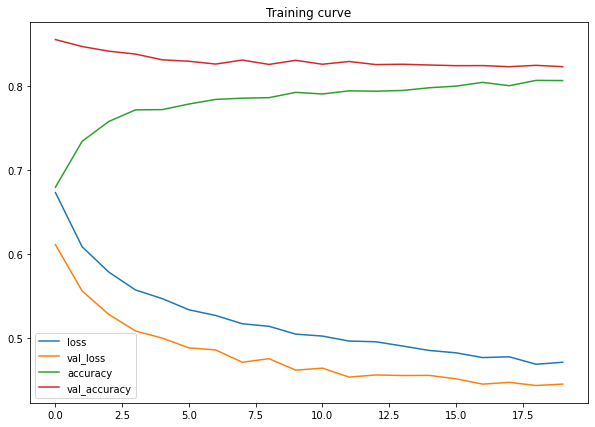

In [210]:
#Plot model history
plot_training_curve(history_model_2)

### Model 3: LSTM

In [211]:
tf.random.set_seed(42)

#Build the model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Dropout(0.4)(x)
x = layers.LSTM(8, kernel_regularizer=tf.keras.regularizers.l2(0.001), activity_regularizer=tf.keras.regularizers.l1(0.001))(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(8, kernel_regularizer=tf.keras.regularizers.l2(0.001), activity_regularizer=tf.keras.regularizers.l1(0.001))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs)

In [212]:
#Compile the model 
model_3.compile(loss="binary_crossentropy", optimizer="Adam", metrics="accuracy")

In [213]:
#Fit the model 
history_model_3 = model_3.fit(train_dataset,
                              epochs=10,
                              batch_size=128,
                              validation_data=val_dataset)

Epoch 1/10
938/938 [==============================] - 25s 24ms/step - loss: 0.4383 - accuracy: 0.8472 - val_loss: 0.4226 - val_accuracy: 0.8553
Epoch 2/10
938/938 [==============================] - 22s 24ms/step - loss: 0.3116 - accuracy: 0.8996 - val_loss: 0.3743 - val_accuracy: 0.8669
Epoch 3/10
938/938 [==============================] - 22s 24ms/step - loss: 0.2664 - accuracy: 0.9183 - val_loss: 0.3975 - val_accuracy: 0.8611
Epoch 4/10
938/938 [==============================] - 22s 24ms/step - loss: 0.2424 - accuracy: 0.9244 - val_loss: 0.3851 - val_accuracy: 0.8666
Epoch 5/10
938/938 [==============================] - 22s 24ms/step - loss: 0.2217 - accuracy: 0.9325 - val_loss: 0.3989 - val_accuracy: 0.8588
Epoch 6/10
938/938 [==============================] - 22s 24ms/step - loss: 0.2040 - accuracy: 0.9392 - val_loss: 0.4381 - val_accuracy: 0.8612
Epoch 7/10
938/938 [==============================] - 22s 24ms/step - loss: 0.1923 - accuracy: 0.9410 - val_loss: 0.4195 - val_accuracy:

In [214]:
#Evaluate
model_3.evaluate(test_dataset)

313/313 [==============================] - 3s 10ms/step - loss: 0.4919 - accuracy: 0.8585


[0.49187085032463074, 0.8585000038146973]

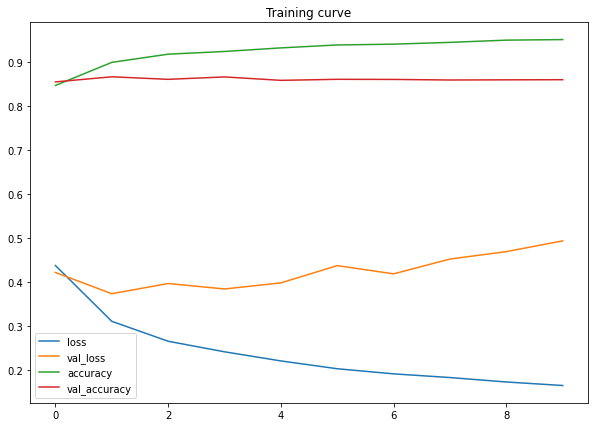

In [215]:
#Plot model history
plot_training_curve(history_model_3)

### Model 4: Bi-LSTM

In [216]:
tf.random.set_seed(42)

#Build the model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Dropout(0.4)(x)
x = layers.Bidirectional(layers.LSTM(4, kernel_regularizer=tf.keras.regularizers.l2(0.001),  activity_regularizer=tf.keras.regularizers.l1(0.001)))(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs)

In [217]:
#Compile the model 
model_4.compile(loss="binary_crossentropy", optimizer="Adam", metrics="accuracy")

In [218]:
#Fit the model 
history_model_4 = model_4.fit(train_dataset,
                              epochs=5,
                              batch_size=128,
                              validation_data=val_dataset)

Epoch 1/5
938/938 [==============================] - 86s 45ms/step - loss: 0.3693 - accuracy: 0.8685 - val_loss: 0.4103 - val_accuracy: 0.8555
Epoch 2/5
938/938 [==============================] - 41s 44ms/step - loss: 0.2476 - accuracy: 0.9225 - val_loss: 0.4198 - val_accuracy: 0.8627
Epoch 3/5
938/938 [==============================] - 41s 44ms/step - loss: 0.1940 - accuracy: 0.9466 - val_loss: 0.4395 - val_accuracy: 0.8587
Epoch 4/5
938/938 [==============================] - 41s 44ms/step - loss: 0.1636 - accuracy: 0.9568 - val_loss: 0.4919 - val_accuracy: 0.8579
Epoch 5/5
938/938 [==============================] - 41s 44ms/step - loss: 0.1495 - accuracy: 0.9605 - val_loss: 0.5028 - val_accuracy: 0.8584


In [219]:
#Evaluate
model_4.evaluate(test_dataset)

313/313 [==============================] - 5s 17ms/step - loss: 0.4961 - accuracy: 0.8611


[0.49606406688690186, 0.8611000180244446]

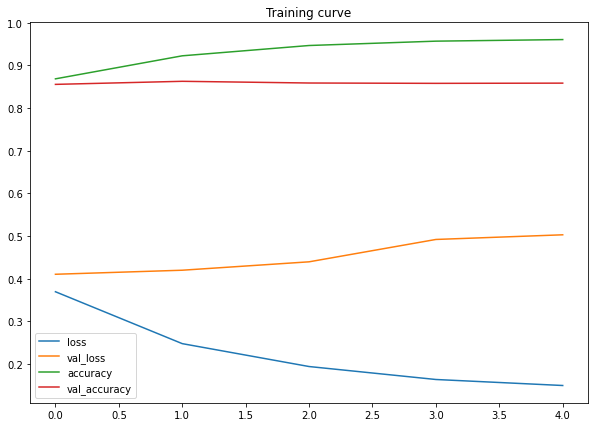

In [220]:
#Plot model history
plot_training_curve(history_model_4)

### Model 5: Feature Extraction

In [259]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [285]:
tf.random.set_seed(42)

#Build the model
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(pretrained_embedding)
x = layers.GRU(128)(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(pretrained_embedding)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs)

In [286]:
#Compile the model 
model_5.compile(loss="binary_crossentropy", optimizer="Adam", metrics="accuracy")

In [287]:
#Fit the model 
history_model_5 = model_5.fit(train_dataset,
                              epochs=5,
                              batch_size=128,
                              validation_data=val_dataset)

Epoch 1/5
938/938 [==============================] - 41s 42ms/step - loss: 0.5542 - accuracy: 0.7109 - val_loss: 0.4161 - val_accuracy: 0.8167
Epoch 2/5
938/938 [==============================] - 39s 42ms/step - loss: 0.4887 - accuracy: 0.7704 - val_loss: 0.4073 - val_accuracy: 0.8227
Epoch 3/5
938/938 [==============================] - 39s 41ms/step - loss: 0.4796 - accuracy: 0.7791 - val_loss: 0.4044 - val_accuracy: 0.8202
Epoch 4/5
938/938 [==============================] - 38s 40ms/step - loss: 0.4747 - accuracy: 0.7783 - val_loss: 0.3977 - val_accuracy: 0.8266
Epoch 5/5
938/938 [==============================] - 38s 41ms/step - loss: 0.4715 - accuracy: 0.7815 - val_loss: 0.3977 - val_accuracy: 0.8256


In [288]:
#Evaluate
model_5.evaluate(test_dataset)

313/313 [==============================] - 9s 30ms/step - loss: 0.3934 - accuracy: 0.8308


[0.39342793822288513, 0.8307999968528748]

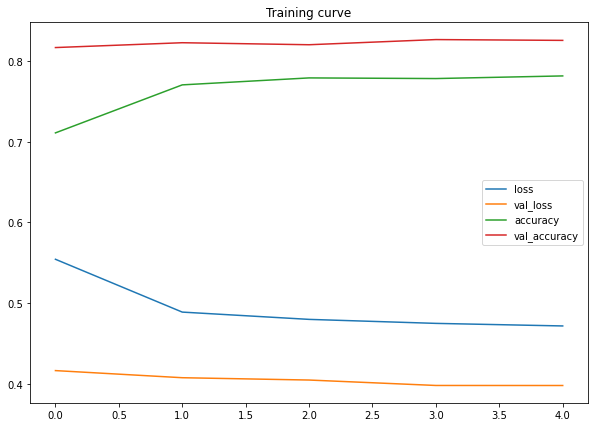

In [289]:
#Plot model history
plot_training_curve(history_model_5)

### Model 6: GRU

In [334]:
tf.random.set_seed(42)

#Build the model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Dropout(0.5)(x)
x = layers.GRU(2, kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_6 = tf.keras.Model(inputs, outputs)

In [335]:
#Compile the model 
model_6.compile(loss="binary_crossentropy", optimizer="Adam", metrics="accuracy")

In [336]:
#Fit the model 
history_model_6 = model_6.fit(train_dataset,
                              epochs=5,
                              batch_size=128,
                              validation_data=val_dataset)

Epoch 1/5
938/938 [==============================] - 25s 24ms/step - loss: 0.6893 - accuracy: 0.5325 - val_loss: 0.6829 - val_accuracy: 0.5496
Epoch 2/5
938/938 [==============================] - 22s 23ms/step - loss: 0.5622 - accuracy: 0.6666 - val_loss: 0.4023 - val_accuracy: 0.8403
Epoch 3/5
938/938 [==============================] - 21s 23ms/step - loss: 0.3360 - accuracy: 0.8288 - val_loss: 0.3985 - val_accuracy: 0.8423
Epoch 4/5
938/938 [==============================] - 22s 23ms/step - loss: 0.3063 - accuracy: 0.8372 - val_loss: 0.4029 - val_accuracy: 0.8444
Epoch 5/5
938/938 [==============================] - 22s 23ms/step - loss: 0.2887 - accuracy: 0.8410 - val_loss: 0.4102 - val_accuracy: 0.8450


In [337]:
#Evaluate
model_6.evaluate(test_dataset)

313/313 [==============================] - 3s 9ms/step - loss: 0.4146 - accuracy: 0.8454


[0.4146472215652466, 0.8453999757766724]

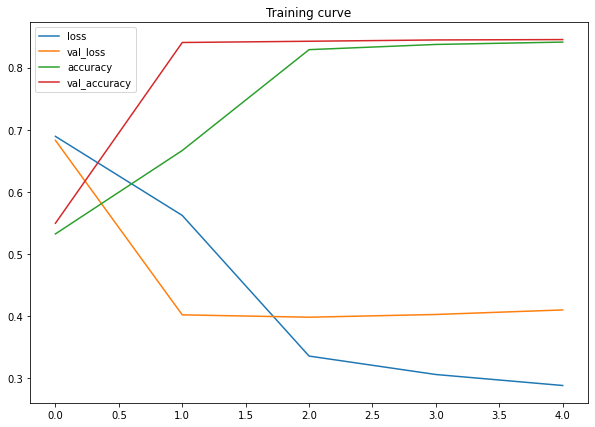

In [338]:
#Plot model history
plot_training_curve(history_model_6)